In [1]:
from classic_alignment import *

In [115]:
bsc = BisegmentationCorpus.create_from_pickle('gold_standard_bisegmentation_corpus.pickle')
b = bsc[2]
combined_lengths = [b.segmentations['en'].get_combined_lengths(),b.segmentations['hu'].get_combined_lengths()]
total_cost = 0
for bs in b:
    print(bs)
    print(bs.number_numbering_diff())
    total_cost += PartialAlignment.calculate_d(bs.start['en'],bs.start['hu'],bs.get_link_type(),bs.segmentations['en'],bs.segmentations['hu'],combined_lengths,model='gc_numbering')
    print()
print('TOTAL:', total_cost)

<en.1>: Judgment of the Court (Third Chamber) of 13 July 2006 — Commission of the European Communities v Portuguese Republic
116 <--------------------> 116
<hu.1>: A Bíróság (harmadik tanács) 2006. július 13-i ítélete – Az Európai Közösségek Bizottsága kontra Portugál Köztársaság
1

<en.2>: (Case C-61/05)
15 <--------------------> 19
<hu.2>: (C-61/05. sz. ügy)
0

<en.3>: (2006/C 224/18)
16 <--------------------> 16
<hu.3>: (2006/C 224/18)
0

<en.4>: Language of the case: Portuguese
33 <--------------------> 28
<hu.4>: Az eljárás nyelve: portugál
0

<en.5>: Parties
8 <--------------------> 6
<hu.5>: Felek
0

<en.6>: Applicant: Commission of the European Communities (represented by: P. Guerra e Andrade and W. Wils, Agents)
108 <--------------------> 106
<hu.6>: Felperes: az Európai Közösségek Bizottsága (képviselők: P. Guerra e Andrade és W. Wils, meghatalmazottak)
0

<en.7>: Defendant: Portuguese Republic (represented by: L. Fernandes and N. Gonçalves, Agents)
87 <--------------------> 

In [116]:
from time import time
alignment_lists = {'GC': list(), 'GC,N': list(), 'GC,N,A': list()}
total_start = time()
for b in bsc:
    file_start = time()
    alignment_lists['GC'].append(b.get_segmentation('en').align(b.get_segmentation('hu')))
    print(b.get_segmentation('en').file, len(b), 'done in', time() - file_start)
print("All done in", time() - total_start)

sentence segmenter train/segmented/C_2006126EN.01001501.dek.txt 26 done in 0.13115596771240234
sentence segmenter train/segmented/C_2006131EN.01005002.dek.txt 21 done in 0.07283711433410645
sentence segmenter train/segmented/C_2006224EN.01001002.dek.txt 14 done in 0.0518643856048584
sentence segmenter train/segmented/C_2007097EN.01000601.dek.txt 195 done in 1.594036340713501
sentence segmenter train/segmented/C_2007170EN.01002701.dek.txt 17 done in 0.05186629295349121
sentence segmenter train/segmented/C_2007236EN.01001001.dek.txt 83 done in 0.5599358081817627
sentence segmenter train/segmented/C_2007311EN.01000201.dek.txt 42 done in 0.19850373268127441
sentence segmenter train/segmented/C_2008014EN.01003801.dek.txt 25 done in 0.12266874313354492
sentence segmenter train/segmented/C_2008064EN.01002901.dek.txt 21 done in 0.06878066062927246
sentence segmenter train/segmented/C_2009032EN.01002303.dek.txt 12 done in 0.022970199584960938
sentence segmenter train/segmented/C_2009167EN.01002

In [117]:
total_start = time()
for b in bsc:
    file_start = time()
    alignment_lists['GC,N'].append(b.get_segmentation('en').align(b.get_segmentation('hu'),'gc_numbering',use_anchors=False))
    print(b.get_segmentation('en').file, len(b), 'done in', time() - file_start)
print("All done in", time() - total_start)

sentence segmenter train/segmented/C_2006126EN.01001501.dek.txt 26 done in 0.26429247856140137
sentence segmenter train/segmented/C_2006131EN.01005002.dek.txt 21 done in 0.13064980506896973
sentence segmenter train/segmented/C_2006224EN.01001002.dek.txt 14 done in 0.07779145240783691
sentence segmenter train/segmented/C_2007097EN.01000601.dek.txt 195 done in 3.062636613845825
sentence segmenter train/segmented/C_2007170EN.01002701.dek.txt 17 done in 0.10027241706848145
sentence segmenter train/segmented/C_2007236EN.01001001.dek.txt 83 done in 0.9848809242248535
sentence segmenter train/segmented/C_2007311EN.01000201.dek.txt 42 done in 0.3400897979736328
sentence segmenter train/segmented/C_2008014EN.01003801.dek.txt 25 done in 0.17837095260620117
sentence segmenter train/segmented/C_2008064EN.01002901.dek.txt 21 done in 0.13614153861999512
sentence segmenter train/segmented/C_2009032EN.01002303.dek.txt 12 done in 0.04339289665222168
sentence segmenter train/segmented/C_2009167EN.010028

In [118]:
total_start = time()
for b in bsc:
    file_start = time()
    alignment_lists['GC,N,A'].append(b.get_segmentation('en').align(b.get_segmentation('hu'),'gc_numbering',use_anchors=True,exact_anchor_segments = exact_anchor_segments_jox_en_hu, anchor_pattern_list = anchor_pattern_list_jox_en_hu))
    print(b.get_segmentation('en').file, len(b), 'done in', time() - file_start)
print("All done in", time() - total_start)

sentence segmenter train/segmented/C_2006126EN.01001501.dek.txt 26 done in 0.28636789321899414
sentence segmenter train/segmented/C_2006131EN.01005002.dek.txt 21 done in 0.04787254333496094
sentence segmenter train/segmented/C_2006224EN.01001002.dek.txt 14 done in 0.01695537567138672
sentence segmenter train/segmented/C_2007097EN.01000601.dek.txt 195 done in 3.3422977924346924
sentence segmenter train/segmented/C_2007170EN.01002701.dek.txt 17 done in 0.039875030517578125
sentence segmenter train/segmented/C_2007236EN.01001001.dek.txt 83 done in 1.3424885272979736
sentence segmenter train/segmented/C_2007311EN.01000201.dek.txt 42 done in 0.4518580436706543
sentence segmenter train/segmented/C_2008014EN.01003801.dek.txt 25 done in 0.06733202934265137
sentence segmenter train/segmented/C_2008064EN.01002901.dek.txt 21 done in 0.05585002899169922
sentence segmenter train/segmented/C_2009032EN.01002303.dek.txt 12 done in 0.009973764419555664
sentence segmenter train/segmented/C_2009167EN.010

In [119]:
aligned_bisegmentations = {'GC': list(), 'GC,N': list(), 'GC,N,A': list()}

for alignment_method in alignment_lists:
    for a in alignment_lists[alignment_method]:
        print(a.segmentations['en'].file, len(a.bisegments))
        aligned_bisegmentations[alignment_method].append(a.get_bisegmentation())

sentence segmenter train/segmented/C_2006126EN.01001501.dek.txt 26
sentence segmenter train/segmented/C_2006131EN.01005002.dek.txt 21
sentence segmenter train/segmented/C_2006224EN.01001002.dek.txt 14
sentence segmenter train/segmented/C_2007097EN.01000601.dek.txt 194
sentence segmenter train/segmented/C_2007170EN.01002701.dek.txt 17
sentence segmenter train/segmented/C_2007236EN.01001001.dek.txt 82
sentence segmenter train/segmented/C_2007311EN.01000201.dek.txt 42
sentence segmenter train/segmented/C_2008014EN.01003801.dek.txt 23
sentence segmenter train/segmented/C_2008064EN.01002901.dek.txt 21
sentence segmenter train/segmented/C_2009032EN.01002303.dek.txt 12
sentence segmenter train/segmented/C_2009167EN.01002801.dek.txt 11
sentence segmenter train/segmented/C_2010161EN.01004501.dek.txt 15
sentence segmenter train/segmented/C_2012049EN.01001802.dek.txt 15
sentence segmenter train/segmented/C_2013331EN.01019801.dek.txt 5
sentence segmenter train/segmented/C_2013352EN.01000301.dek.tx

sentence segmenter train/segmented/L_2015347EN.01141801.dek.txt 1346
sentence segmenter train/segmented/L_2016126EN.01006301.dek.txt 69
sentence segmenter train/segmented/L_2016230EN.01000501.dek.txt 25
sentence segmenter train/segmented/L_2018068EN.01001001.dek.txt 50
sentence segmenter train/segmented/L_2018089EN.01002003.dek.txt 6
sentence segmenter train/segmented/L_2018092EN.01001901.dek.txt 670
sentence segmenter train/segmented/C_2011030EN.01005802.dek.txt 13
sentence segmenter train/segmented/C_2013335EN.01002201.dek.txt 147
sentence segmenter train/segmented/C_2014118EN.01000601.dek.txt 22
sentence segmenter train/segmented/C_2016024EN.01011702.dek.txt 3
sentence segmenter train/segmented/CE2013051EN.01000101.dek.txt 97
sentence segmenter train/segmented/L_2008348EN.01008401.dek.txt 203
sentence segmenter train/segmented/L_2010011EN.01000701.dek.txt 106
sentence segmenter train/segmented/L_2011100EN.01007301.dek.txt 29
sentence segmenter train/segmented/L_2015015EN.01007501.de

In [120]:
total_anchors = 0
total_partials = 0
for a in alignment_lists['GC,N,A']:
    total_anchors += a.number_of_anchors
    total_partials += len(a.partial_alignments)
print(total_anchors)
print(total_partials)

656
433


In [121]:
total_link_types_gold = {}
total_individual_links_gold = 0

total_link_types_generated = {'GC': {}, 'GC,N': {}, 'GC,N,A': {}}

diffs_by_file = {'GC': {}, 'GC,N': {}, 'GC,N,A': {}}
diff_sequence_lengths = {'GC': list(), 'GC,N': list(), 'GC,N,A': list()}

total_individual_links_generated = {'GC': 0, 'GC,N': 0, 'GC,N,A': 0}
total_correct_individual_links = {'GC': 0, 'GC,N': 0, 'GC,N,A': 0}


for i, bs in enumerate(bsc):
    bs_individual = bisegments_to_individual_links(bs.bisegment_list)

    for k,v in bs.count_link_types().items():
        if k in total_link_types_gold:
            total_link_types_gold[k] += v
        else:
            total_link_types_gold[k] = v

    total_individual_links_gold += len(bs_individual)

    for alignment_method in aligned_bisegmentations:
        bsa = aligned_bisegmentations[alignment_method][i]
        bsa_individual = bisegments_to_individual_links(bsa.bisegment_list)

        for k,v in bsa.count_link_types().items():
            if k in total_link_types_generated[alignment_method]:
                total_link_types_generated[alignment_method][k] += v
            else:
                total_link_types_generated[alignment_method][k] = v

        total_individual_links_generated[alignment_method] += len(bsa_individual)
        total_correct_individual_links[alignment_method] += len(set(bs_individual).intersection(set(bsa_individual)))

        diffs = list()
        previous = 0
        length = 0
        for j, bsg in enumerate(bs.bisegment_list):
            if bsg not in bsa.bisegment_list:
                diffs.append(bsg)
                if previous != j-1 and length != 0:
                    diff_sequence_lengths[alignment_method].append(length)
                    length = 1
                else:
                    length += 1
                previous = j
        if length != 0:
            diff_sequence_lengths[alignment_method].append(length)

        diffs_by_file[alignment_method][bs.segmentations['en'].file] = diffs
#    if diffs:
#        print('file', i)
#        print(bs.segmentations['en'].file,len(bs),len(bsa))
#        print(diffs)
    
    

In [122]:
# total number of diffs and detailed numbers by link type for each method
for alignment_method in diffs_by_file:
    diff_types_total = list()
    for dbf in diffs_by_file[alignment_method].values():
        for diff in dbf:
            diff_types_total.append((diff[0][1],diff[1][1]))
    print(alignment_method, len(diff_types_total))
    link_types = set(diff_types_total)
    print({dt: diff_types_total.count(dt) for dt in link_types})

GC 214
{(1, 2): 30, (3, 1): 1, (2, 1): 12, (2, 2): 1, (1, 1): 170}
GC,N 148
{(1, 2): 15, (3, 1): 1, (1, 1): 124, (2, 1): 8}
GC,N,A 125
{(1, 2): 13, (1, 1): 103, (2, 1): 8, (2, 2): 1}


In [123]:
for alignment_method in diff_sequence_lengths:
    print(alignment_method)
    for l in set(diff_sequence_lengths[alignment_method]):
        print(l, diff_sequence_lengths[alignment_method].count(l))
    print()

GC
1 1
2 43
3 5
4 5
5 3
6 2
7 1
8 1
14 1
15 1
21 1

GC,N
2 42
3 6
4 2
7 2
10 1
14 1

GC,N,A
1 1
2 40
3 3
4 1
7 1
10 1
14 1



In [124]:
print('Total individual links')
print('Gold', total_individual_links_gold)
for alignment_method in total_individual_links_generated:
    print(alignment_method, 'generated:', total_individual_links_generated[alignment_method], 
          'correct:', total_correct_individual_links[alignment_method])

Total individual links
Gold 8737
GC generated: 8831 correct: 8619
GC,N generated: 8853 correct: 8695
GC,N,A generated: 8841 correct: 8703


In [125]:
print('Precision:')
for alignment_method in total_individual_links_generated:
    print(alignment_method, total_correct_individual_links[alignment_method] / total_individual_links_generated[alignment_method])
print('Recall:')
for alignment_method in total_individual_links_generated:
    print(alignment_method, total_correct_individual_links[alignment_method] / total_individual_links_gold)

Precision:
GC 0.9759936587022987
GC,N 0.9821529425053654
GC,N,A 0.9843909060061079
Recall:
GC 0.9864942199839762
GC,N 0.9951928579603984
GC,N,A 0.9961085040631796


In [4435]:
{dt: diff_types_total.count(dt) for dt in link_types}

{(1, 2): 15, (3, 2): 0, (3, 1): 1, (2, 1): 8, (2, 2): 0, (1, 1): 124}

In [573]:
{dt: diff_types_total.count(dt) for dt in total_link_types_gold}

{(1, 2): 13, (1, 1): 103, (3, 1): 0, (2, 1): 8, (2, 2): 1, (3, 2): 0}

In [43]:
sum(total_link_types_gold.values())

8550

In [44]:
{k: v/sum(total_link_types_gold.values()) for k,v in total_link_types_gold.items()}

{(1, 2): 0.011812865497076023,
 (1, 1): 0.9809356725146199,
 (3, 1): 0.00023391812865497077,
 (2, 1): 0.005847953216374269,
 (2, 2): 0.0010526315789473684,
 (3, 2): 0.00011695906432748539}

In [45]:
for alignment_method in total_link_types_generated:
    print(alignment_method, sum(total_link_types_generated[alignment_method].values()))
    print({k: v/sum(total_link_types_generated[alignment_method].values()) for k,v in total_link_types_generated[alignment_method].items()})

GC 8514
{(1, 2): 0.011980267794221282, (1, 1): 0.9749823819591261, (3, 1): 0.0002349072116513977, (2, 1): 0.005872680291284942, (2, 2): 0.004345783415550857, (1, 0): 0.00035236081747709656, (3, 2): 0.0010570824524312897, (0, 1): 0.0010570824524312897, (2, 3): 0.00011745360582569885}
GC,N 8505
{(1, 2): 0.011757789535567314, (1, 1): 0.9746031746031746, (2, 1): 0.005643738977072311, (2, 3): 0.00011757789535567314, (2, 2): 0.0048206937095825984, (1, 0): 0.00011757789535567314, (3, 2): 0.0016460905349794238, (0, 1): 0.0011757789535567313, (3, 1): 0.00011757789535567314}
GC,N,A 8513
{(1, 2): 0.01151180547398097, (1, 1): 0.9754493128156937, (3, 1): 0.00023493480559144838, (2, 1): 0.005286033125807588, (2, 3): 0.00011746740279572419, (2, 2): 0.004346293903441795, (1, 0): 0.00023493480559144838, (3, 2): 0.0015270762363444143, (0, 1): 0.001292141430752966}


In [3893]:
left_links = {1: 0, 2: 0, 3: 0}
right_links = {1: 0, 2: 0, 3: 0}
for k,v in total_link_types_gold.items():
    left_links[k[0]] += v
    right_links[k[1]] += v
print(left_links,right_links)
left_mean = sum([(k-1)*v for k,v in left_links.items()]) / 8446
right_mean = sum([(k-1)*v for k,v in right_links.items()]) / 8446
print("Means:", left_mean, right_mean)
print('Left Poisson')
for i in range(4):
    print(i, scipy.stats.poisson.pmf(i, left_mean, 0) * 8446)
print('Left Poisson')
for i in range(4):
    print(i, scipy.stats.poisson.pmf(i, right_mean, 0) * 8446)


{1: 8385, 2: 58, 3: 3} {1: 8336, 2: 110, 3: 0}
Means: 0.007577551503670376 0.01302391664693346
Left Poisson
0 8382.24187033423
1 63.516869488679916
2 0.24065117495119082
3 0.0006078488908704806
Left Poisson
0 8336.713215770438
1 108.57665803158284
2 0.7070466720029666
3 0.0030695056405527807


In [4253]:
(63/8446) * (109/8446) * 8446

0.8130475964953825

In [1444]:
def shift_bisegment(bs,num,en_shift,hu_shift):
    ((en,enl),(hu,hul)) = bs[num]
    bs[num] = ((en,enl+en_shift),(hu,hul+hu_shift))
    for i in range(num+1,len(bs)):
        ((a,b),(c,d)) = bs[i]
        bs[i] = ((a+en_shift,b),(c+hu_shift,d))

In [2639]:
shift_bisegment(bisegments,353,1,1)

In [3691]:
bisegments[-1] = ((680, 2), (683, 2))

In [2444]:
bisegments.append(((bisegments[-1][0][0]+1, 1), (bisegments[-1][1][0]+1, 1)))

In [3687]:
bisegments.pop()

((681, 1), (684, 1))

In [1415]:
for i in range(116,len(bisegments)):
    ((a,b),(c,d)) = bisegments[i]
    bisegments[i] = ((a+1,b),(c,d))

In [725]:
def segment_bitext(en_file_name, directory = 'sentence segmenter train/segmented/', boundary_symbol = '¤', lower_case_tokens = True):
    input_file = [en_file_name,en_file_name.replace('EN','HU')]
    segmentations = list()
    for i in range(2):
        with open(directory+input_file[i],encoding='utf8') as f:
            segmentations.append(Segmenter(f.read(),boundary_symbol,lower_case_tokens))
    return segmentations

In [4345]:
ss = segment_bitext('L_2007122EN.01003101.dek.txt', directory = 'sentence segmenter train/segmented/')

In [4361]:
ss = segment_bitext('L_2007122EN.01003101.dek.txt', directory = 'sentence segmenter train/segmented/')
bisegments = aligned_bisegmentations[25].bisegment_list

In [4346]:
for s in ss:
    print(len(s))
bisegments = [((i,1),(i,1)) for i in range(1,min(len(ss[0]),len(ss[1]))+1)]

127
127


In [4362]:
bs = Bisegmentation(ss,bisegments)

In [4363]:
print(bs)

<1>: Megállapodás
<1>: Agreement
9 12 0.7474487607482386

<2>: az Európai Közösség és a Paraguayi Köztársaság között a légi szolgáltatások bizonyos kérdéseiről
<2>: between the European Community and the Republic of Paraguay on certain aspects of air services
95 97 0.22404263446054126

<3>: AZ EURÓPAI KÖZÖSSÉG
<3>: THE EUROPEAN COMMUNITY,
24 20 1.533962787286001

<4>: egyrészről, és
<4>: of the one part, and
21 15 2.6043812853121504

<5>: A PARAGUAYI KÖZTÁRSASÁG
<5>: THE REPUBLIC OF PARAGUAY,
26 24 0.8471908839603071

<6>: másrészről
<6>: of the other part,
19 11 4.20693493509657

<7>: (a továbbiakban: a szerződő felek)
<7>: (hereinafter referred to as the Parties),
42 35 1.9508870670412826

<8>: MEGÁLLAPÍTVA, hogy az Európai Közösség számos tagállama és a Paraguayi Köztársaság között olyan kétoldalú légiközlekedési megállapodások kötettek meg, amelyek az európai közösségi joggal ellentétes rendelkezéseket tartalmaznak,
<8>: NOTING that bilateral air service agreements have been conclu

In [38]:
token_count = [0,0]
segment_count = [0,0]
for b in bsc:
    for l in [0,1]:
        segment_count[l] += len(b.segmentations[b.langs[l]])
        for s in b.segmentations[b.langs[l]]:
            token_count[l] += len(s.get_tokens('all'))
print(token_count)
print(segment_count)

[229237, 207528]
[8615, 8661]


In [2718]:
m = [(a,b) for i in l for ((_,a),(_,b)) in i.bisegments]
link_types = set(m)
link_type_counts = {}
for lt in link_types:
    link_type_counts[lt] = m.count(lt)

In [2719]:
link_type_counts

{(1, 2): 100, (3, 2): 1, (3, 1): 2, (2, 1): 49, (2, 2): 8, (1, 1): 8287}

In [2722]:
print(["%2.5f"%(f / 8447) for f in pandas.Series(m).value_counts().to_numpy()])

['0.98106', '0.01184', '0.00580', '0.00095', '0.00024', '0.00012']


In [2724]:
lengths = [(n, i, l[0], l[1]) for n, b in bisegmentations.items() for i, l in enumerate(b.bisegment_lengths)]
lengths_t = np.array(lengths).transpose()

In [4419]:
lengths

[('C_2006126EN.01001501.dek.txt', 0, 64, 69),
 ('C_2006126EN.01001501.dek.txt', 1, 33, 48),
 ('C_2006126EN.01001501.dek.txt', 2, 161, 158),
 ('C_2006126EN.01001501.dek.txt', 3, 16, 16),
 ('C_2006126EN.01001501.dek.txt', 4, 30, 26),
 ('C_2006126EN.01001501.dek.txt', 5, 567, 517),
 ('C_2006126EN.01001501.dek.txt', 6, 63, 75),
 ('C_2006126EN.01001501.dek.txt', 7, 299, 312),
 ('C_2006126EN.01001501.dek.txt', 8, 171, 183),
 ('C_2006126EN.01001501.dek.txt', 9, 267, 285),
 ('C_2006126EN.01001501.dek.txt', 10, 332, 347),
 ('C_2006126EN.01001501.dek.txt', 11, 23, 24),
 ('C_2006126EN.01001501.dek.txt', 12, 180, 179),
 ('C_2006126EN.01001501.dek.txt', 13, 451, 436),
 ('C_2006126EN.01001501.dek.txt', 14, 31, 43),
 ('C_2006126EN.01001501.dek.txt', 15, 87, 83),
 ('C_2006126EN.01001501.dek.txt', 16, 140, 156),
 ('C_2006126EN.01001501.dek.txt', 17, 65, 82),
 ('C_2006126EN.01001501.dek.txt', 18, 45, 68),
 ('C_2006126EN.01001501.dek.txt', 19, 47, 43),
 ('C_2006126EN.01001501.dek.txt', 20, 12, 12),
 ('C_

In [2726]:
ldf = pandas.DataFrame({'filename': lengths_t[0], 'bs_index': lengths_t[1], 'en': lengths_t[2], 'hu': lengths_t[3]})
ldf['bs_index'] = ldf['bs_index'].astype(int)
ldf['en'] = ldf['en'].astype(int)
ldf['hu'] = ldf['hu'].astype(int)

In [2736]:
c = ldf['hu'].sum() / ldf['en'].sum()

In [2737]:
s2 = (ldf['hu'] / ldf['en']).var()

In [2977]:
length_diffs = ldf['hu'] - ldf['en']
length_diffs_corrected = ldf['hu'] - ldf['en'] * c
hu_en_ratio = ldf['hu'] / ldf['en']
hu_en_log_ratio = np.log(ldf['hu'] / ldf['en'])
hu_en_avg_length = (ldf['hu'] + ldf['en']) / 2
hu_en_avg_length_2d = np.array(hu_en_avg_length).reshape((len(hu_en_avg_length),1))
delta = length_diffs_corrected / np.sqrt(np.max(np.concatenate([hu_en_avg_length_2d, 6.31 * hu_en_avg_length_2d - 195],1),1))


In [2980]:
delta.describe()

count    8447.000000
mean       -0.049885
std         0.997564
min        -5.627360
25%        -0.686656
50%        -0.102127
75%         0.497382
max         5.834867
dtype: float64

In [2976]:
hu_en_avg_length.reshape((len(hu_en_avg_length))).shape

(8447,)

In [2978]:
ldf2 = pandas.DataFrame({'length_diffs': length_diffs, 'delta': delta, 'length_diffs_corrected': length_diffs_corrected, 'hu_en_ratio': hu_en_ratio, 'hu_en_log_ratio': hu_en_log_ratio, 'hu_en_avg_length': hu_en_avg_length, 'length_diffs_scaled': length_diffs_corrected / np.sqrt(hu_en_avg_length)})
ldf2.to_csv('segment_length_diffs.csv')

In [2915]:
sorted_ldf2 = ldf2.sort_values(by='hu_en_avg_length')

In [2919]:
num_slices = 50
ldf2_statistics = pandas.DataFrame({'median_length': np.zeros(num_slices),
                                    'mean_log_length_ratio': np.zeros(num_slices), 'std_dev_log_length_ratio': np.zeros(num_slices),
                                    'mean_corrected_length_diff': np.zeros(num_slices), 'std_dev_corrected_length_diff': np.zeros(num_slices),
                                    'mean_scaled_length_diff': np.zeros(num_slices), 'std_dev_scaled_length_diff': np.zeros(num_slices) })
slice_length = int(len(sorted_ldf2)/num_slices)
for i in range(num_slices):
    data_slice = sorted_ldf2.iloc[(i*slice_length):(i+1)*slice_length,:]
    ldf2_statistics['median_length'][i] = data_slice.iloc[:,5].median()
    ldf2_statistics['mean_log_length_ratio'][i] = data_slice.iloc[:,4].mean()
    ldf2_statistics['std_dev_log_length_ratio'][i] = data_slice.iloc[:,4].std()
    ldf2_statistics['mean_corrected_length_diff'][i] = data_slice.iloc[:,2].mean()
    ldf2_statistics['std_dev_corrected_length_diff'][i] = data_slice.iloc[:,2].std()
    ldf2_statistics['mean_scaled_length_diff'][i] = data_slice.iloc[:,6].mean()
    ldf2_statistics['std_dev_scaled_length_diff'][i] = data_slice.iloc[:,6].std()
    


In [2920]:
ldf2_statistics.to_csv('binned_segment_length_statistics.csv')

In [2944]:
print(np.corrcoef(ldf2_statistics['median_length'],ldf2_statistics['mean_log_length_ratio']).min(),
np.corrcoef(ldf2_statistics['median_length'],ldf2_statistics['std_dev_log_length_ratio']).min(),
np.corrcoef(ldf2_statistics['median_length'],ldf2_statistics['mean_corrected_length_diff']).min(),
np.corrcoef(ldf2_statistics['median_length'],ldf2_statistics['std_dev_corrected_length_diff']**2).min(),
np.corrcoef(ldf2_statistics['median_length'],ldf2_statistics['mean_scaled_length_diff']).min(),
np.corrcoef(ldf2_statistics['median_length'],ldf2_statistics['std_dev_scaled_length_diff']).min())

0.4513200761583586 -0.8429292175907948 0.5075667165564602 0.9692691763191984 0.5215913738798686 0.7850423133533275


In [2945]:
print(np.corrcoef(np.sqrt(ldf2_statistics['median_length']),ldf2_statistics['mean_log_length_ratio']).min(),
np.corrcoef(np.sqrt(ldf2_statistics['median_length']),ldf2_statistics['std_dev_log_length_ratio']).min(),
np.corrcoef(np.sqrt(ldf2_statistics['median_length']),ldf2_statistics['mean_corrected_length_diff']).min(),
np.corrcoef(np.sqrt(ldf2_statistics['median_length']),ldf2_statistics['std_dev_corrected_length_diff']**2).min(),
np.corrcoef(np.sqrt(ldf2_statistics['median_length']),ldf2_statistics['mean_scaled_length_diff']).min(),
np.corrcoef(np.sqrt(ldf2_statistics['median_length']),ldf2_statistics['std_dev_scaled_length_diff']).min() )

0.5514966634934215 -0.8761183636020017 0.47009091781367623 0.9257967698236097 0.5541547671607328 0.8869324891298399


In [2941]:
linear_model = np.polyfit(ldf2_statistics['median_length'],ldf2_statistics['std_dev_corrected_length_diff']**2,1)

In [2942]:
linear_model

array([   6.30855829, -194.64674862])

In [2943]:
linear_model[0]

6.30855828899928

In [2932]:
4 * 2.86179056 - 8.189845199774718

3.257317040225283

In [2674]:
for i in hu_en_ratio[hu_en_ratio < 0.5].index:
    print(check_bisegment(i))

C_2007097EN.01000601.dek.txt / 110

<115>: Az EU pénzügyi határozatai mint negatív példa
<120>: Financial decisions by the EU provide an example of the kind of action which should be avoided.
46 96 inf


C_2007097EN.01000601.dek.txt / 132

<138>: A biodiverzitás megőrzése egyelőre alig haladja meg az üres szólamok szintjét.
<143>: In the case of the conservation of biodiversity, we have, as yet, barely gone beyond the stage of expressing political lip service to the pursuit of this goal.
79 160 inf


C_2007097EN.01000601.dek.txt / 185

<192>: Mindez bosszantó.
<196>: All of this is a source of irritation.
18 39 inf


C_2007236EN.01001001.dek.txt / 58

<61>: A maradék sót lemossák róla.
<60>: The residual salt is removed by rinsing the legs with water.
29 61 inf


C_2019206EN.01009501.dek.txt / 7

<8>: Kérelmek
<8>: Form of order sought
9 21 inf


L_2013348EN.01000101.dek.txt / 121

<123>: Tárgy
<122>: Subject matter
6 15 inf


L_2013348EN.01000101.dek.txt / 134

<137>: E rendelet alkal

C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [2645]:
ldf.loc[]

filename    L_2014189EN.01009301.dek.txt
bs_index                              67
en                                    12
hu                                    22
Name: 3212, dtype: object

In [2630]:
def check_bisegment(n):
    b = bisegmentations[ldf.loc[n]['filename']]
    bisegment = b.bisegments[ldf.loc[n]['bs_index']]
    hu_start = bisegment[1][0]-1
    hu_end = hu_start + bisegment[1][1]
    en_start = bisegment[0][0]-1
    en_end = en_start + bisegment[0][1]
    
    rep = '%s / %d\n\n'%( ldf.loc[n]['filename'], ldf.loc[n]['bs_index'] )
    rep += '<%d>: '%(hu_start+1) + ''.join(b.segments[1][hu_start:hu_end]).strip() + '\n'
    rep += '<%d>: '%(en_start+1) + ''.join(b.segments[0][en_start:en_end]).strip() + '\n'
    rep += ' '.join([str(ldf.loc[n]['hu']),str(ldf.loc[n]['en']), str(negative_log_probability_by_length(ldf.loc[n]['hu'],ldf.loc[n]['en']))])+'\n\n'
    return rep

In [2633]:
bisegments = bisegmentations['L_2014108EN.01001601.dek.txt'].bisegments

In [2669]:
print(check_bisegment(514))

C_2013352EN.01000301.dek.txt / 10

<11>: Az előzetes döntéshozatalra előterjesztett kérdések
<11>: Questions referred
52 19 inf




C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [2634]:
419     2.625000
492     2.736842
514     2.736842
4579    3.166667
5783    2.833333
5833    2.750000
6243    4.800000
6480    2.785714
6549    2.785714
6576    2.583333
6927    3.500000
7637    2.550000
7693    2.588235

419

In [2740]:
length_diffs[:20]

0      5
1     15
2     -3
3      0
4     -4
5    -50
6     12
7     13
8     12
9     18
10    15
11     1
12    -1
13   -15
14    12
15    -4
16    16
17    17
18    23
19    -4
dtype: int32

In [2783]:
ldf

,filename,bs_index,en,hu
0,C_2006126EN.01001501.dek.txt,0,64,69
1,C_2006126EN.01001501.dek.txt,1,33,48
2,C_2006126EN.01001501.dek.txt,2,161,158
3,C_2006126EN.01001501.dek.txt,3,16,16
4,C_2006126EN.01001501.dek.txt,4,30,26
5,C_2006126EN.01001501.dek.txt,5,567,517
6,C_2006126EN.01001501.dek.txt,6,63,75
7,C_2006126EN.01001501.dek.txt,7,299,312
8,C_2006126EN.01001501.dek.txt,8,171,183
9,C_2006126EN.01001501.dek.txt,9,267,285


In [2803]:
np.log(1.07)

0.06765864847381486

In [2762]:
scipy.stats.hmean([0.1,1,1,10])

0.3305785123966942

In [2816]:
length_diffs_corrected.abs()[length_diffs_corrected.abs() < 140].describe()

count    8432.000000
mean       17.439136
std        19.287273
min         0.020016
25%         4.021795
50%        11.085519
75%        23.734039
max       135.180572
dtype: float64

In [2826]:
hg = np.histogram(length_diffs_corrected.abs()[length_diffs_corrected.abs() < 140], bins=140, range = (0,139),density=True)

In [2842]:
len(np.concatenate((hg[0],[0])))

141

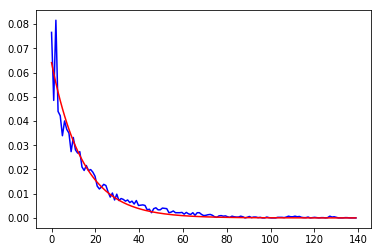

In [3838]:
def exfun(x, a, b):
    return a * np.exp(-b * x)
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
popt, pcov = curve_fit(exfun, hg[1], np.concatenate((hg[0],[0])))
plt.plot(hg[1], np.concatenate((hg[0],[0])), 'b-')
plt.plot(hg[1], exfun(hg[1], popt[0], popt[1]), 'r-')

In [2988]:
diffs_from_diagonal = np.zeros((len(bisegmentations),5),int)
b_keys = list(bisegmentations.keys())
for b in range(len(bisegmentations)):
    diffs_from_diagonal[b,0] = len(bisegmentations[b_keys[b]].segments[0])
    diffs_from_diagonal[b,1] = len(bisegmentations[b_keys[b]].segments[1])
    diffs_from_diagonal[b,2] = diffs_from_diagonal[b,0] - diffs_from_diagonal[b,1]
    min_diff = max(diffs_from_diagonal[b,1],diffs_from_diagonal[b,2])
    max_diff = -min_diff
    for s in bisegmentations[b_keys[b]].bisegments:
        if s[0][0] - s[1][0] < min_diff:
            min_diff = s[0][0] - s[1][0]
        elif s[0][0] - s[1][0] > max_diff:
            max_diff = s[0][0] - s[1][0]
    diffs_from_diagonal[b,3] = min_diff
    diffs_from_diagonal[b,4] = max_diff

In [2989]:
diffs_from_diagonal

array([[  26,   27,   -1,   -1,    0],
       [  21,   21,    0,    0,    0],
       [  16,   14,    2,    0,    2],
       [ 207,  203,    4,   -1,    6],
       [  17,   18,   -1,   -1,    0],
       [  84,   88,   -4,   -4,    0],
       [  42,   42,    0,    0,    0],
       [  26,   25,    1,    0,    1],
       [  21,   21,    0,    0,    0],
       [  12,   12,    0,    0,    0],
       [  12,   11,    1,    0,    1],
       [  15,   16,   -1,   -1,    0],
       [  16,   16,    0,    0,    0],
       [   5,    5,    0,    0,    0],
       [  17,   17,    0,    0,    0],
       [  27,   27,    0,    0,    0],
       [ 467,  491,  -24,  -24,    0],
       [  16,   17,   -1,   -1,    0],
       [   7,    9,   -2,   -2,    0],
       [  21,   21,    0,    0,    0],
       [  15,   15,    0,    0,    0],
       [  13,   13,    0,    0,    0],
       [  22,   23,   -1,   -1,    0],
       [   5,    5,    0,    0,    0],
       [  18,   18,    0,    0,    1],
       [  21,   21,    0,

In [2997]:
(diffs_from_diagonal[2] == 0) & (diffs_from_diagonal[3] == 0) & (diffs_from_diagonal[4] == 0)

array([False, False, False, False, False])

In [2998]:
diffs_from_diagonal[2]

array([16, 14,  2,  0,  2])

In [3000]:
diffs_from_diagonal = diffs_from_diagonal.transpose()

In [3023]:
((diffs_from_diagonal[2] == 0) & (diffs_from_diagonal[3] == 0) & (diffs_from_diagonal[4] == 0)).sum()

43

In [3021]:
diffs_from_diagonal_df = pandas.DataFrame(diffs_from_diagonal.transpose())

In [3027]:
diffs_from_diagonal_df[flines]

,0,1,2,3,4
0,26,27,-1,-1,0
2,16,14,2,0,2
3,207,203,4,-1,6
4,17,18,-1,-1,0
5,84,88,-4,-4,0
7,26,25,1,0,1
10,12,11,1,0,1
11,15,16,-1,-1,0
16,467,491,-24,-24,0
17,16,17,-1,-1,0


In [3032]:
np.log((1 - scipy.stats.norm.cdf(5.83)) * 2)

-19.01077730621367

In [3832]:
def number_numbering_differences(list_of_bisegmentations):
    num_differences = list()
    for j, b in enumerate(list_of_bisegmentations):
        differences_by_file = 0
        for i, b1 in enumerate(b):
            en_num_num = (b1.get_token_set('en',lower=True).intersection(numbering_set)).union(b1.get_token_set('en','numeric'))
            ts1 = np.array(list(b1.get_token_set('en','all',lower=False)))
            en_mixed = ts1[np.char.isalnum(ts1) & ~np.char.isalpha(ts1) & ~np.char.isnumeric(ts1)] 
            hu_num_num = (b1.get_token_set('hu',lower=True).intersection(numbering_set)).union(b1.get_token_set('hu','numeric'))
            ts1 = np.array(list(b1.get_token_set('hu','all',lower=False)))
            hu_mixed = ts1[np.char.isalnum(ts1) & ~np.char.isalpha(ts1) & ~np.char.isnumeric(ts1)] 
            nd = len(en_num_num.union(en_mixed).symmetric_difference(hu_num_num.union(hu_mixed)))
            num_differences.append(nd)
            differences_by_file += nd
            if nd > 4:
                print(j, nd, 'diffs')
                if i > 0:
                    print(b[i-1])
                print(b1)
                if i < len(b) - 1:
                    print(b[i+1])
                print(b1.get_token_set('en','all'))
                print(en_num_num)
                print(en_mixed)
                print(b1.get_token_set('hu','all'))
                print(hu_num_num)
                print(hu_mixed)
        print(b.get_segmentation('en').file,len(b),differences_by_file)
        print()


sentence segmenter train/segmented/C_2006126EN.01001501.dek.txt 26 4

sentence segmenter train/segmented/C_2006131EN.01005002.dek.txt 21 1

sentence segmenter train/segmented/C_2006224EN.01001002.dek.txt 14 3

sentence segmenter train/segmented/C_2007097EN.01000601.dek.txt 196 32

sentence segmenter train/segmented/C_2007170EN.01002701.dek.txt 17 6

sentence segmenter train/segmented/C_2007236EN.01001001.dek.txt 83 2

sentence segmenter train/segmented/C_2007311EN.01000201.dek.txt 42 0

sentence segmenter train/segmented/C_2008014EN.01003801.dek.txt 25 0

sentence segmenter train/segmented/C_2008064EN.01002901.dek.txt 21 6

sentence segmenter train/segmented/C_2009032EN.01002303.dek.txt 12 4

sentence segmenter train/segmented/C_2009167EN.01002801.dek.txt 11 1

11 6 diffs
<en.11>: Pleas in law and main arguments
32 <--------------------> 29
<hu.11>: Jogalapok és fontosabb érvek
<en.12>: Community trade mark concerned: Figurative mark, representing the shape of a parallelogram, for good

In [3835]:
num_diff_counts = np.array([[numdiff,num_differences.count(numdiff)] for numdiff in set(num_differences)])

In [4291]:
bisegmentation2_list_temp[3].segmentations['en'].file

'sentence segmenter train/segmented/C_2007097EN.01000601.dek.txt'

In [4308]:
bisegments = bisegmentation2_list_temp[3].bisegment_list

In [4309]:
bisegments.pop(180)

((192, 1), (187, 1))

In [4364]:
bstemp = Bisegmentation2([bisegmentation2_list_temp[25].segmentations['en'],bisegmentation2_list_temp[25].segmentations['hu']],bisegments)

In [4365]:
print(bstemp)

<en.1>: Agreement
9 <--------------------> 12
<hu.1>: Megállapodás

<en.2>: between the European Community and the Republic of Paraguay on certain aspects of air services
95 <--------------------> 97
<hu.2>: az Európai Közösség és a Paraguayi Köztársaság között a légi szolgáltatások bizonyos kérdéseiről

<en.3>: THE EUROPEAN COMMUNITY,
24 <--------------------> 20
<hu.3>: AZ EURÓPAI KÖZÖSSÉG

<en.4>: of the one part, and
21 <--------------------> 15
<hu.4>: egyrészről, és

<en.5>: THE REPUBLIC OF PARAGUAY,
26 <--------------------> 24
<hu.5>: A PARAGUAYI KÖZTÁRSASÁG

<en.6>: of the other part,
19 <--------------------> 11
<hu.6>: másrészről

<en.7>: (hereinafter referred to as the Parties),
42 <--------------------> 35
<hu.7>: (a továbbiakban: a szerződő felek)

<en.8>: NOTING that bilateral air service agreements have been concluded between several Member States of the European Community and the Republic of Paraguay containing provisions contrary to European Community law,
208 <------

In [4355]:
for j, b in enumerate(bisegmentation2_list_temp):
    bs = b.bisegment_list
    for i in range(1,len(bs)):
        for l in range(2):
            if sum(bs[i-1][l]) != bs[i][l][0]:
                print(j, b.segmentations[0].file)
                print('Error in bisegmentation on %s side: %d: %s, %d: %s'%(b.langs[l],i-1,str(bs[i-1][l]),i,bs[i][l]))
    for l in range(2):
        if sum(bs[-1][l])-1 != len(b.segmentations[b.langs[l]]):
            print(j, b.segmentations['en'].file)
            print('Length mismatch in bisegmentation on %s side: segmentation length is %d but the last segment in the bisegmentation is %d'%(b.langs[l],len(b.segmentations[b.langs[l]]),sum(bs[-1][l])-1))

In [4401]:
filtered_segment_ranges = list([0,0])
langs = ['en','hu']
for l in range(2):
    filtered_segment_ranges[l] = [b[l] for b in a.bisegments if b != None]

for l in range(2):
    for i in range(1,len(filtered_segment_ranges)):
        if sum(filtered_segment_ranges[l][i-1]) != filtered_segment_ranges[l][i][0]:
            print('Error in bisegmentation on %s side: %s followed by %s'%(langs[l],str(filtered_segment_ranges[i-1][l]),filtered_segment_ranges[i][l]))
for l in range(2):
    if filtered_segment_ranges[l][0][0] != 1:
        print('Error: Bisegmentation on %s side begins with segment %d'%(langs[l],filtered_segment_ranges[l][0][0]))
    if sum(filtered_segment_ranges[l][-1])-1 != len(a.segmentations[l]):
        print('Length mismatch in bisegmentation on %s side: segmentation length is %d but the last segment in the bisegmentation is %d'%(langs[l],len(a.segmentations[l]),sum(filtered_segment_ranges[-1][l])-1))


In [4445]:
calculate_num_diff_costs(bisegmentation2_list_temp,10)

[0.09284056 0.64238895]
0 8205.8198713584 8205
1 272.4398637890576 272
2 53.23636505681004 49
3 13.281105117392036 18
4 3.672338331296633 5
6 0.3263083594168537 1


[0.04108764001551542,
 3.446268655524567,
 5.078944845400192,
 6.467344204673746,
 7.752857955264343,
 8.981365958320257,
 10.173599018834427,
 11.340704097632814,
 12.48936906874207,
 13.62392318960404]

In [4451]:
scipy.stats.poisson.pmf(5,popt[0],popt[1])*8550

1.0749999425154428

In [4452]:
num_differences = [bs.number_numbering_diff() for b in bisegmentation2_list_temp for bs in b]

In [4453]:
num_diff_counts = np.array([[numdiff,num_differences.count(numdiff)] for numdiff in set(num_differences)]).transpose()

In [4454]:
num_diff_counts

array([[   0,    1,    2,    3,    4,    6],
       [8205,  272,   49,   18,    5,    1]])

In [4457]:
for i in range(7):
    print(scipy.stats.poisson.pmf(i, sum(num_diff_counts[0]*num_diff_counts[1]) / sum(num_diff_counts[1])) * len(num_differences))

8111.637054140538
426.92826600739653
11.2349543686157
0.19710446260729295
0.0025934797711485917
2.7299787064721994e-05
2.394718163572102e-07


In [4458]:
sum(num_diff_counts[0]*num_diff_counts[1]) / sum(num_diff_counts[1])

0.05263157894736842

In [4459]:
popt

[0.09284056, 0.64238895]

In [4477]:
short_matches = {}
for b in bisegmentation2_list_temp:
    for bs in b:
        if bs.get_link_type() == (1,1) and bs.get_combined_length('en') < 70 and bs.get_combined_length('hu') < 70:
            segment_tuple = (str(list(bs.get_segments('en').values())[0]).strip().lower(),str(list(bs.get_segments('hu').values())[0]).strip().lower())
            if segment_tuple in short_matches:
                short_matches[segment_tuple] += 1
            else:
                short_matches[segment_tuple] = 1

In [ ]:
import os
short_matches = {}

from time import time
total_start = time()

for i, f in enumerate([f for f in os.listdir('sentence segmenter train/temp/dek/') if 'EN' in f]):
    file_start = time()
    s_en = Segmentation('en', file = 'sentence segmenter train/temp/dek/'+f)
    s_hu = Segmentation('hu', file = 'sentence segmenter train/temp/dek/'+f.replace('EN','HU'))
    print(i,f,'en length:',len(s_en),'hu length:', len(s_hu))
    a = s_en.align(s_hu,'gc_numbering')
    b = a.get_bisegmentation()
    print('bisegments:', len(b), 'done in', time() - file_start)
    short_matches_in_file = {}

    for bs in b:
        if bs.get_link_type() == (1,1) and bs.get_combined_length('en') < 70 and bs.get_combined_length('hu') < 70:
            segment_tuple = (str(list(bs.get_segments('en').values())[0]).strip().lower(),str(list(bs.get_segments('hu').values())[0]).strip().lower())
            if segment_tuple not in short_matches_in_file:
                short_matches_in_file[segment_tuple] = 1
    for sm in short_matches_in_file:
        if sm not in short_matches:
            short_matches[sm] = 1
        else:
            short_matches[sm] += 1
print("All done in", time() - total_start)

In [ ]:
short_matches_filtered = {}
for k,v in short_matches.items():
    if v > 3:
        short_matches_filtered[k] = v

sorted_short_matches = [(k,v) for k, v in sorted(short_matches_filtered.items(), key=lambda item: item[1])]
sorted_short_matches.reverse()

sorted_multimatches = {}
for l in sorted_short_matches:
    if l[0][0] in sorted_multimatches:
        sorted_multimatches[l[0][0]].append(l[0][1])
    else:
        sorted_multimatches[l[0][0]] = list([l[0][1]])

In [77]:
from collections import defaultdict as dd
types = {'en': dd(int), 'hu': dd(int)}
for b in bisegmentation2_list_temp:
    for s in b.segmentations.values():
        l = s.lang
        for seg in s:
            for t in seg.get_tokens():
                if t.isalnum():
                    types[l][t.lower()] += 1
print(len(types['en']))
print(len(types['hu']))
hapax = {'en': 0, 'hu': 0}
for l in types:
    for v in types[l].values():
        if v == 1:
            hapax[l] += 1
print(hapax['en'])
print(hapax['hu'])

8846
19769
3101
9736


In [79]:
print([(k,v) for k, v in sorted(types['en'].items(), key=lambda item: item[1])][-10:])
print([(k,v) for k, v in sorted(types['hu'].items(), key=lambda item: item[1])][-10:])

[('be', 1540), ('by', 1542), ('that', 1788), ('a', 2545), ('for', 2611), ('in', 4955), ('and', 4985), ('to', 5334), ('of', 9475), ('the', 16780)]
[('vonatkozó', 754), ('2', 872), ('1', 1060), ('kell', 1082), ('nem', 1314), ('vagy', 1367), ('hogy', 1493), ('és', 4498), ('az', 6710), ('a', 13420)]


In [83]:
print(sum(list(sorted(types['en'].values())[-2:])))
print(sum(list(sorted(types['hu'].values())[-4:])))

26255
26121


In [56]:
import json

In [57]:
with open('full_filtered_file_lists.json') as infile:
    data = json.loads(infile.read())

In [61]:
full_file_list_en = data['en']
full_file_list_hu = data['hu']

In [62]:
len(full_file_list_en)

103793

In [63]:
len(alignment_lists['GC,N,A'])

70

In [106]:
for i, al in enumerate(alignment_lists['GC,N,A']):
    total_cost = 0
    total_bisegments = 0
    for pa in al.partial_alignments.values():
        if isinstance(pa.D,shifted_array):
            total_cost += pa.D.to_numpy()[-1,-1]
        else:
            total_cost += pa.D[-1,-1]
        total_bisegments += len(pa.bisegments)
    print(len(diffs_by_file['GC,N,A'][bsc[i].segmentations['en'].file]))
    print(total_cost / total_bisegments)

0
1.4019373253489082
0
2.0111046004436823
0
1.807581222226779
9
2.76407476475227
0
2.3613997113406557
4
1.281185008190456
0
1.1935672241096227
0
1.0427415742003658
0
2.2184560310460184
0
2.0286356149921025
0
3.8589492978260083
0
2.865273914419271
0
2.2168371263645663
0
0.605514836517522
0
1.635789168126072
0
1.7074074324036925
12
1.3308890562944131
0
2.1276822239511546
0
1.6026943615331757
0
1.491065409041417
0
0.5120823610122177
0
0.8268269291380101
0
1.5519921806192856
0
0.8412722017451986
0
1.3133486626457653
0
0.932647001126777
0
1.4116970829806945
0
1.7338998716215277
0
0.40593467074262135
0
1.2496198387678257
0
0.36797406452729287
0
0.8386043834926953
0
1.4304416664149178
0
1.211280670101826
0
0.7205880060038783
0
0.9181503483088203
6
1.0339630070880093
2
1.2870165926563983
0
0.9852395106490074
0
0.5603792409315542
0
1.099550662320437
2
0.9657758852550831
0
0.6681783803093259
6
0.9164323589720049
49
1.505392680140639
0
0.8791200443648988
4
2.894383952424015
0
0.92407902184511
2
2

In [89]:
isinstance(list(alignment_lists['GC,N,A'][0].partial_alignments.values())[0].D,shifted_array)

True

In [91]:
pad = list(alignment_lists['GC,N,A'][0].partial_alignments.values())[0].D

In [92]:
isinstance(pad,shifted_array)

True

In [93]:
pad.m

27

In [94]:
pad.n

15

In [96]:
pad[pad.m,pad.n]

inf

In [98]:
pad.to_numpy()[-1,-1]

36.450370459071614

In [100]:
alignment_lists['GC,N,A'][0]

In [109]:
np.full((2,3),0,dtype=(np.int,2))

array([[[0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0]]])

In [132]:
np.full((1,),fill_value = np.inf, dtype = np.float64)[0]

inf

In [140]:
0 * -np.inf

nan